<a href="https://colab.research.google.com/github/BhaveshVadher1/Walmart---Confidence-Interval-and-CLT/blob/main/Walmart_Analysis_Bhavesh.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
df=pd.read_csv("/content/drive/MyDrive/walmart_data.csv")
import matplotlib.pyplot as plt
import seaborn as sns

# Analysing the basic characteristics of Dataset

In [ ]:
df

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969
...,...,...,...,...,...,...,...,...,...,...
550063,1006033,P00372445,M,51-55,13,B,1,1,20,368
550064,1006035,P00375436,F,26-35,1,C,3,0,20,371
550065,1006036,P00375436,F,26-35,15,B,4+,1,20,137
550066,1006038,P00375436,F,55+,1,C,2,0,20,365


In [ ]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969


In [ ]:
print(f"Number of rows : {df.shape[0]}\nNumber of columns: {df.shape[1]}" )

Number of rows : 550068
Number of columns: 10


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   User_ID                     550068 non-null  int64 
 1   Product_ID                  550068 non-null  object
 2   Gender                      550068 non-null  object
 3   Age                         550068 non-null  object
 4   Occupation                  550068 non-null  int64 
 5   City_Category               550068 non-null  object
 6   Stay_In_Current_City_Years  550068 non-null  object
 7   Marital_Status              550068 non-null  int64 
 8   Product_Category            550068 non-null  int64 
 9   Purchase                    550068 non-null  int64 
dtypes: int64(5), object(5)
memory usage: 42.0+ MB


In [ ]:
df.isna().sum()
#no null value found in dataset

User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category              0
Purchase                      0
dtype: int64

In [ ]:
df.describe(include="all")

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
count,5.500680e+05,550068,550068,550068,550068.000000,550068,550068,550068.000000,550068.000000,550068.000000
unique,NaN,3631,2,7,NaN,3,5,NaN,NaN,NaN
top,NaN,P00265242,M,26-35,NaN,B,1,NaN,NaN,NaN
freq,NaN,1880,414259,219587,NaN,231173,193821,NaN,NaN,NaN
mean,1.003029e+06,NaN,NaN,NaN,8.076707,NaN,NaN,0.409653,5.404270,9263.968713
std,1.727592e+03,NaN,NaN,NaN,6.522660,NaN,NaN,0.491770,3.936211,5023.065394
min,1.000001e+06,NaN,NaN,NaN,0.000000,NaN,NaN,0.000000,1.000000,12.000000
25%,1.001516e+06,NaN,NaN,NaN,2.000000,NaN,NaN,0.000000,1.000000,5823.000000
50%,1.003077e+06,NaN,NaN,NaN,7.000000,NaN,NaN,0.000000,5.000000,8047.000000
75%,1.004478e+06,NaN,NaN,NaN,14.000000,NaN,NaN,1.000000,8.000000,12054.000000


In [ ]:
df['Gender'].value_counts()

M    414259
F    135809
Name: Gender, dtype: int64

Text(0.5, 1.0, 'Gender')

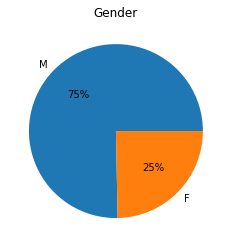

In [ ]:
data=list(df['Gender'].value_counts().reset_index()['Gender'])
keys=list(df['Gender'].value_counts().reset_index()['index'])
plt.pie(data, labels=keys,autopct='%.0f%%')
plt.title('Gender')

In [ ]:
df1=df['Age'].value_counts()
df1

26-35    219587
36-45    110013
18-25     99660
46-50     45701
51-55     38501
55+       21504
0-17      15102
Name: Age, dtype: int64

Text(0.5, 1.0, 'Age')

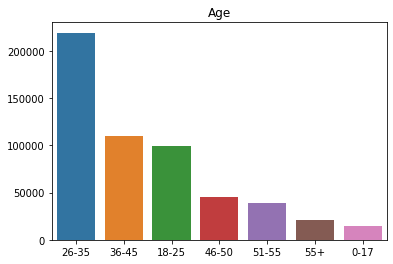

In [ ]:
data=list(df['Age'].value_counts().reset_index()['Age'])
keys=list(df['Age'].value_counts().reset_index()['index'])
sns.barplot(data=df, x=keys, y=data)
plt.title('Age')

In [ ]:
df['Occupation'].value_counts()

4     72308
0     69638
7     59133
1     47426
17    40043
20    33562
12    31179
14    27309
2     26588
16    25371
6     20355
3     17650
10    12930
5     12177
15    12165
11    11586
19     8461
13     7728
18     6622
9      6291
8      1546
Name: Occupation, dtype: int64

Text(0.5, 1.0, 'Occupation')

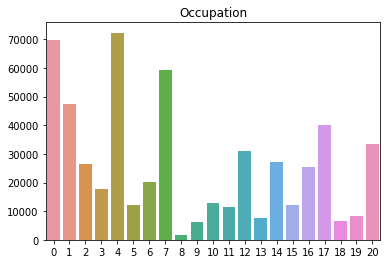

In [ ]:
data=list(df['Occupation'].value_counts().reset_index()['Occupation'])
keys=list(df['Occupation'].value_counts().reset_index()['index'])
sns.barplot(data=df, x=keys, y=data)
plt.title('Occupation')

In [ ]:
df["City_Category"].value_counts()

B    231173
C    171175
A    147720
Name: City_Category, dtype: int64

Text(0.5, 1.0, 'City_Category')

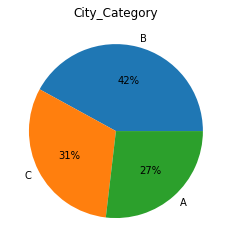

In [ ]:
data=list(df['City_Category'].value_counts().reset_index()['City_Category'])
keys=list(df['City_Category'].value_counts().reset_index()['index'])
plt.pie(data, labels=keys,autopct='%.0f%%')
plt.title('City_Category')

In [ ]:
df["Stay_In_Current_City_Years"].value_counts()

1     193821
2     101838
3      95285
4+     84726
0      74398
Name: Stay_In_Current_City_Years, dtype: int64

Text(0.5, 1.0, 'Stay_In_Current_City_Years')

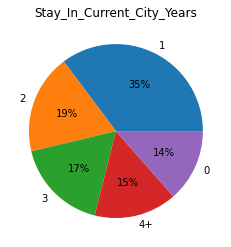

In [ ]:
data=list(df['Stay_In_Current_City_Years'].value_counts().reset_index()['Stay_In_Current_City_Years'])
keys=list(df['Stay_In_Current_City_Years'].value_counts().reset_index()['index'])
plt.pie(data, labels=keys,autopct='%.0f%%')
plt.title('Stay_In_Current_City_Years')

In [ ]:
df['Marital_Status'].value_counts()

0    324731
1    225337
Name: Marital_Status, dtype: int64

Text(0.5, 1.0, 'Marital_Status')

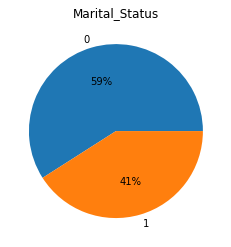

In [ ]:
data=list(df['Marital_Status'].value_counts().reset_index()['Marital_Status'])
keys=list(df['Marital_Status'].value_counts().reset_index()['index'])
plt.pie(data, labels=keys,autopct='%.0f%%')
plt.title('Marital_Status')

In [ ]:
df["Product_Category"].value_counts()

5     150933
1     140378
8     113925
11     24287
2      23864
6      20466
3      20213
4      11753
16      9828
15      6290
13      5549
10      5125
12      3947
7       3721
18      3125
20      2550
19      1603
14      1523
17       578
9        410
Name: Product_Category, dtype: int64

Text(0.5, 1.0, 'Product_Category')

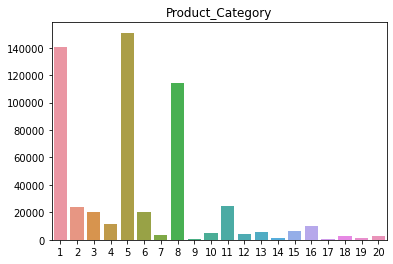

In [ ]:
data=list(df['Product_Category'].value_counts().reset_index()['Product_Category'])
keys=list(df['Product_Category'].value_counts().reset_index()['index'])
sns.barplot(data=df, x=keys, y=data)
plt.title('Product_Category')

In [ ]:
df['Purchase'].value_counts()

7011     191
7193     188
6855     187
6891     184
7012     183
        ... 
23491      1
18345      1
3372       1
855        1
21489      1
Name: Purchase, Length: 18105, dtype: int64

In [ ]:
for col_name in df.select_dtypes(np.number).columns:
    print(col_name)
    print(f'MEAN --> {df[col_name].mean()}')
    print(f'MEDIAN --> {df[col_name].median()}')
    print(f'MODE --> {df[col_name].mode()[0]}')
    print(f'STANDARD DEVIATION --> {df[col_name].std()}')

    sns.displot(data= df, x = col_name, kind="kde")
    plt.title(col_name)
    plt.grid(True)
    plt.show()

#Basic Statistics Analysis

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
User_ID,547391.0,1.003028e+06,1727.356809,1000001.0,1001516.0,1003075.0,1004478.0,1006040.0
Occupation,547391.0,8.074627e+00,6.521586,0.0,2.0,7.0,14.0,20.0
Marital_Status,547391.0,4.094861e-01,0.491739,0.0,0.0,0.0,1.0,1.0
Product_Category,547391.0,5.378945e+00,3.927383,1.0,1.0,5.0,8.0,20.0
Purchase,547391.0,9.195627e+03,4938.872953,12.0,5721.0,8038.0,12019.0,21399.0


In [ ]:
df.describe(include=['object','category']).T

,count,unique,top,freq
Product_ID,550068,3631,P00265242,1880
Gender,550068,2,M,414259
Age,550068,7,26-35,219587
City_Category,550068,3,B,231173
Stay_In_Current_City_Years,550068,5,1,193821


In [ ]:
df.groupby(['Gender'])['Purchase'].describe()

,count,mean,std,min,25%,50%,75%,max
Gender,,,,,,,,
F,135809.0,8734.565765,4767.233289,12.0,5433.0,7914.0,11400.0,23959.0
M,414259.0,9437.526040,5092.186210,12.0,5863.0,8098.0,12454.0,23961.0


In [ ]:
df.groupby(['Marital_Status'])['Purchase'].describe()

,count,mean,std,min,25%,50%,75%,max
Marital_Status,,,,,,,,
0,324731.0,9265.907619,5027.347859,12.0,5605.0,8044.0,12061.0,23961.0
1,225337.0,9261.174574,5016.897378,12.0,5843.0,8051.0,12042.0,23961.0


In [ ]:
df.groupby(['Age'])['Purchase'].describe()

,count,mean,std,min,25%,50%,75%,max
Age,,,,,,,,
0-17,15102.0,8933.464640,5111.114046,12.0,5328.0,7986.0,11874.0,23955.0
18-25,99660.0,9169.663606,5034.321997,12.0,5415.0,8027.0,12028.0,23958.0
26-35,219587.0,9252.690633,5010.527303,12.0,5475.0,8030.0,12047.0,23961.0
36-45,110013.0,9331.350695,5022.923879,12.0,5876.0,8061.0,12107.0,23960.0
46-50,45701.0,9208.625697,4967.216367,12.0,5888.0,8036.0,11997.0,23960.0
51-55,38501.0,9534.808031,5087.368080,12.0,6017.0,8130.0,12462.0,23960.0
55+,21504.0,9336.280459,5011.493996,12.0,6018.0,8105.5,11932.0,23960.0


In [ ]:
df.groupby(['City_Category'])['Purchase'].describe()

,count,mean,std,min,25%,50%,75%,max
City_Category,,,,,,,,
A,147720.0,8911.939216,4892.115238,12.0,5403.0,7931.0,11786.0,23961.0
B,231173.0,9151.300563,4955.496566,12.0,5460.0,8005.0,11986.0,23960.0
C,171175.0,9719.920993,5189.465121,12.0,6031.5,8585.0,13197.0,23961.0


User_ID
MEAN --> 1003028.8424013031
MEDIAN --> 1003077.0
MODE --> 1001680
STANDARD DEVIATION --> 1727.5915855305516


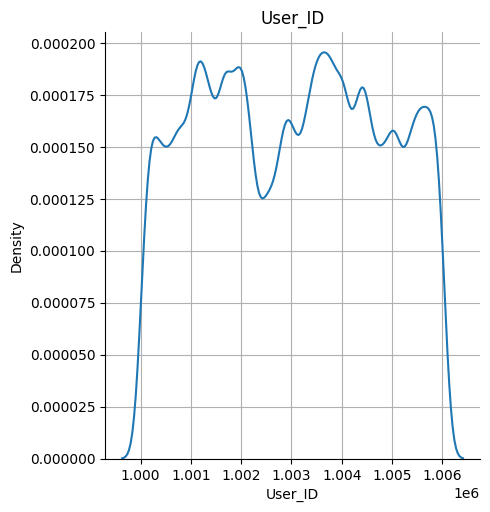

Occupation
MEAN --> 8.076706879876669
MEDIAN --> 7.0
MODE --> 4
STANDARD DEVIATION --> 6.522660487341824


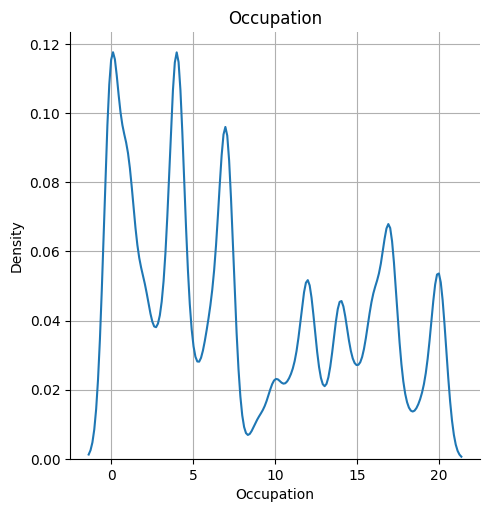

Marital_Status
MEAN --> 0.40965298835780306
MEDIAN --> 0.0
MODE --> 0
STANDARD DEVIATION --> 0.49177012631733


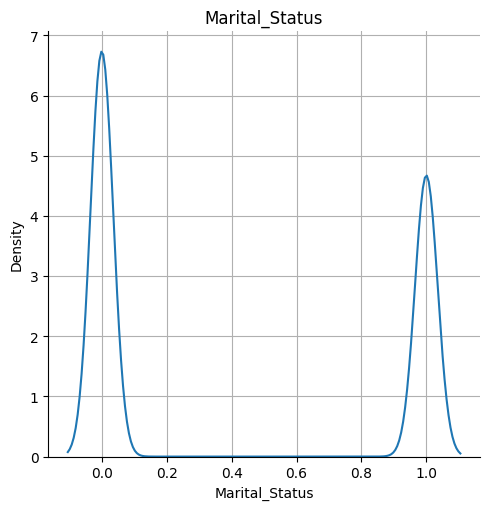

Product_Category
MEAN --> 5.404270017525106
MEDIAN --> 5.0
MODE --> 5
STANDARD DEVIATION --> 3.936211369201389


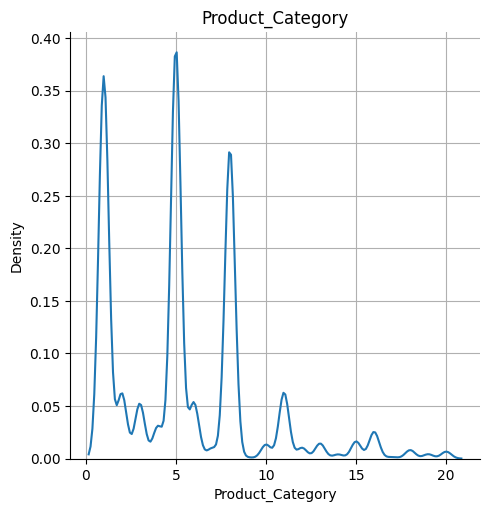

Purchase
MEAN --> 9263.968712959126
MEDIAN --> 8047.0
MODE --> 7011
STANDARD DEVIATION --> 5023.065393820582


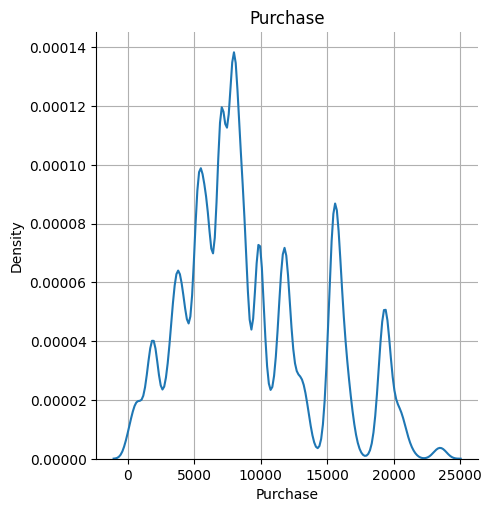

In [ ]:
for col_name in df.select_dtypes(np.number).columns:
  print(col_name)
  print(f'MEAN --> {df[col_name].mean()}')
  print(f'MEDIAN --> {df[col_name].median()}')
  print(f'MODE --> {df[col_name].mode()[0]}')
  print(f'STANDARD DEVIATION --> {df[col_name].std()}')
  sns.displot(data= df, x = col_name, kind="kde")
  plt.title(col_name)
  plt.grid(True)
  plt.show()

# Outlier analysis

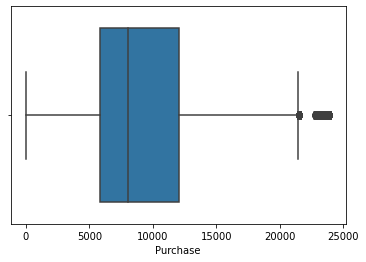

In [ ]:
#detecting outlies for continuous variables
sns.boxplot(data=df, x='Purchase', orient='h')
plt.show()

In [ ]:
#Calculating the Number of outliers present in "Purchase"
P_25=np.percentile(df["Purchase"],25)
P_75=np.percentile(df["Purchase"],75)
IQR=P_75 -P_25
lower=max(P_25-1.5*IQR,0)
upper=(P_75+1.5*IQR)
df1=df[df["Purchase"]>upper]
len(df1)



2677

In [ ]:
#Percentage of column data which is outlier
len(df1)/len(df)*100

0.7549975639375496

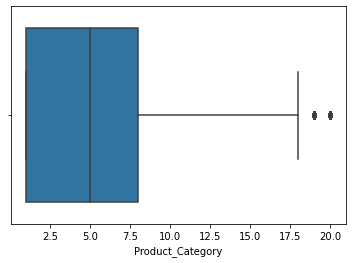

In [ ]:
sns.boxplot(data=df, x='Product_Category')
plt.show()

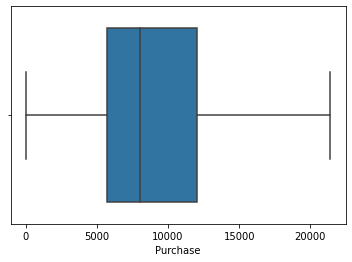

In [ ]:
#Outlier Treatment: Remove top 5% & bottom 1% of the Column Outlier values
Q3 = df['Purchase'].quantile(0.75)
Q1 = df['Purchase'].quantile(0.25)
IQR = Q3-Q1
df = df[(df['Purchase'] > Q1 - 1.5*IQR) & (df['Purchase'] < Q3 + 1.5*IQR)]
sns.boxplot(data=df, x='Purchase', orient='h')
plt.show()

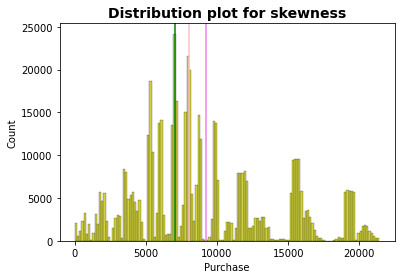

In [ ]:
# Visualising Skewness
sns.histplot(df["Purchase"],color='y')
plt.title("Distribution plot for skewness", fontweight="bold",fontsize=14)
plt.axvline(df["Purchase"].mean(),color="violet")
plt.axvline(df["Purchase"].median(),color="pink")
plt.axvline(df["Purchase"].mode()[0],color="green")
#Data is"right-skewed distribution" which means the mass of the distribution is concentrated on the left of the figure.

# Univariate Analysis

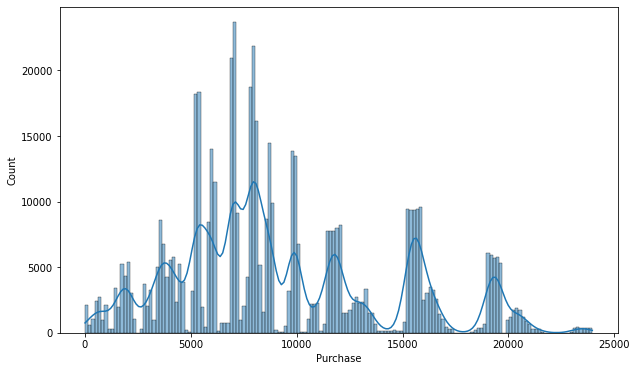

In [ ]:
#understanding the distribution of data
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Purchase', kde=True)
plt.show()

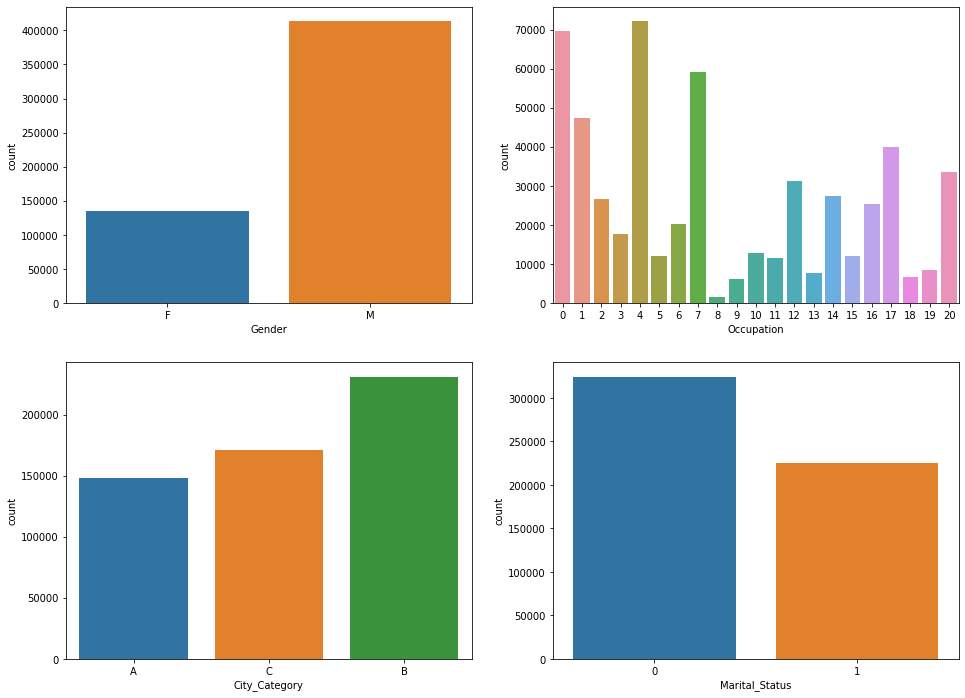

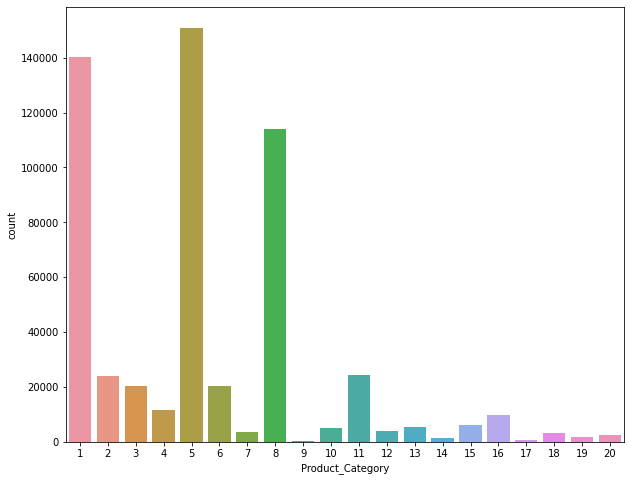

In [ ]:
categorical_cols = ['Gender', 'Occupation','City_Category','Marital_Status','Product_Category']

fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(16, 12))
sns.countplot(data=df, x='Gender', ax=axs[0,0])
sns.countplot(data=df, x='Occupation', ax=axs[0,1])
sns.countplot(data=df, x='City_Category', ax=axs[1,0])
sns.countplot(data=df, x='Marital_Status', ax=axs[1,1])
plt.show()

plt.figure(figsize=(10, 8))
sns.countplot(data=df, x='Product_Category')
plt.show()

#Bi-variate Analysis

<Axes: xlabel='Gender', ylabel='Purchase'>

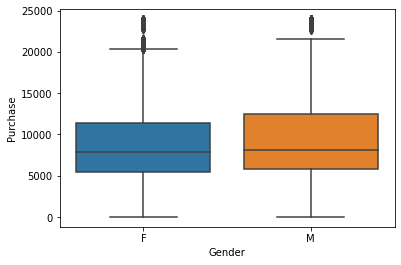

In [ ]:
sns.boxplot(data=df, y='Purchase', x='Gender')

Text(0.5, 1.0, 'Purchase vs Gender')

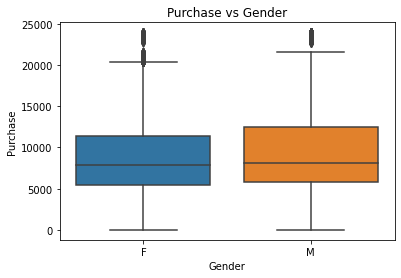

In [ ]:
 sns.boxplot(data=df, y='Purchase', x='Gender').set_title("Purchase vs Gender")

Text(0.5, 1.0, 'Purchase vs Age')

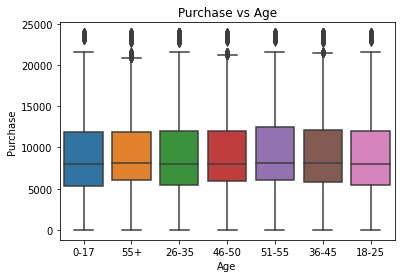

In [ ]:
sns.boxplot(data=df, y='Purchase', x='Age').set_title("Purchase vs Age")

Text(0.5, 1.0, 'Purchase vs Occupation')

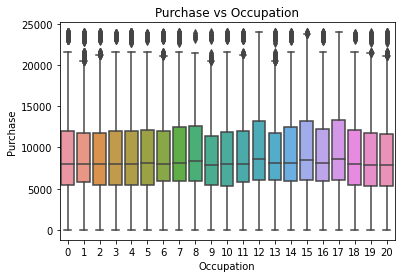

In [ ]:
sns.boxplot(data=df, y='Purchase', x='Occupation').set_title("Purchase vs Occupation")

Text(0.5, 1.0, 'Purchase vs City_Category')

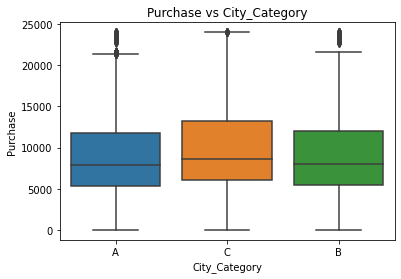

In [ ]:
sns.boxplot(data=df, y='Purchase', x='City_Category').set_title("Purchase vs City_Category")

Text(0.5, 1.0, 'Purchase vs Stay_In_Current_City_Years')

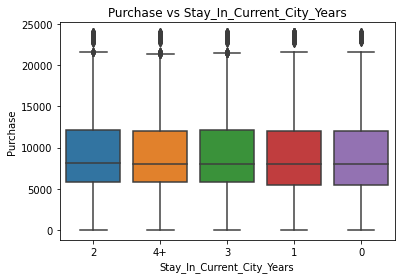

In [ ]:
sns.boxplot(data=df, y='Purchase', x='Stay_In_Current_City_Years').set_title("Purchase vs Stay_In_Current_City_Years")

Text(0.5, 1.0, 'Purchase vs Martial_Status')

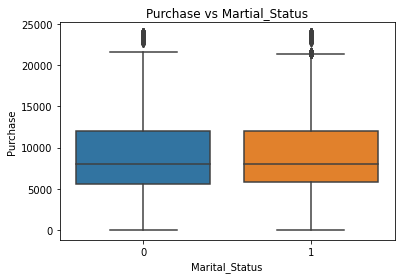

In [ ]:
sns.boxplot(data=df, y='Purchase', x='Marital_Status').set_title("Purchase vs Martial_Status")

Text(0.5, 1.0, 'Purchase vs Product_Category')

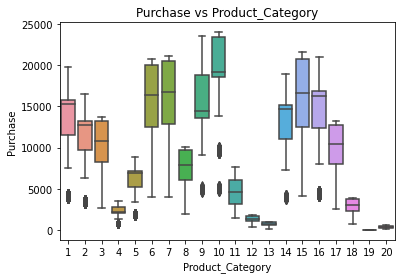

In [ ]:
sns.boxplot(data=df, y='Purchase', x='Product_Category').set_title("Purchase vs Product_Category")

#Multivariate Analysis

<Axes: xlabel='Gender', ylabel='Purchase'>

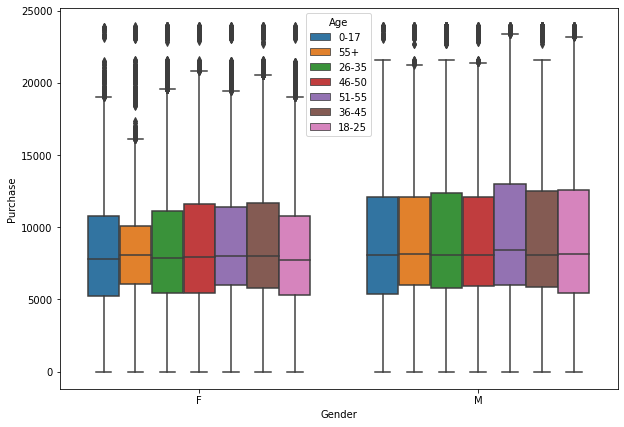

In [ ]:
plt.figure(figsize = (10, 7))
sns.boxplot(data=df, y='Purchase', x='Gender', hue='Age')

<Axes: xlabel='Gender', ylabel='Purchase'>

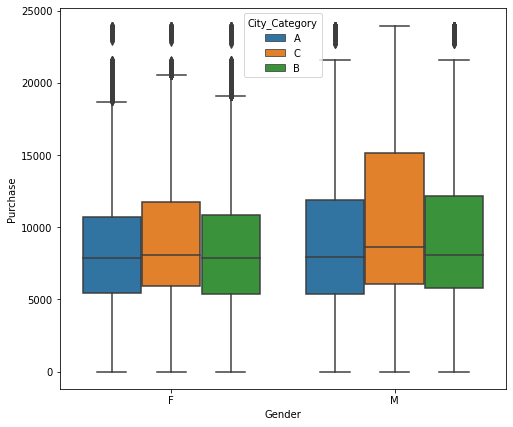

In [ ]:
plt.figure(figsize = (8, 7))
sns.boxplot(data=df, y='Purchase', x='Gender', hue='City_Category')

<Axes: xlabel='Gender', ylabel='Purchase'>

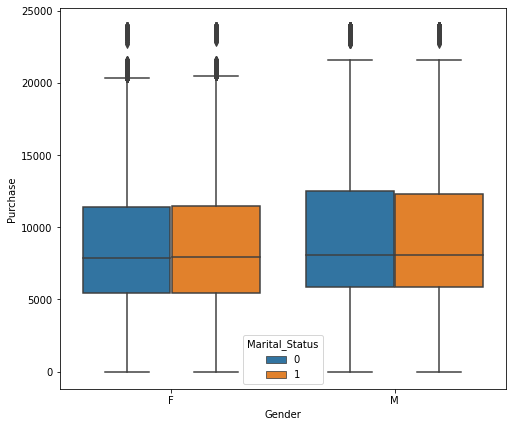

In [ ]:
plt.figure(figsize = (8, 7))
sns.boxplot(data=df, y='Purchase', x='Gender', hue='Marital_Status')

<Axes: xlabel='Gender', ylabel='Purchase'>

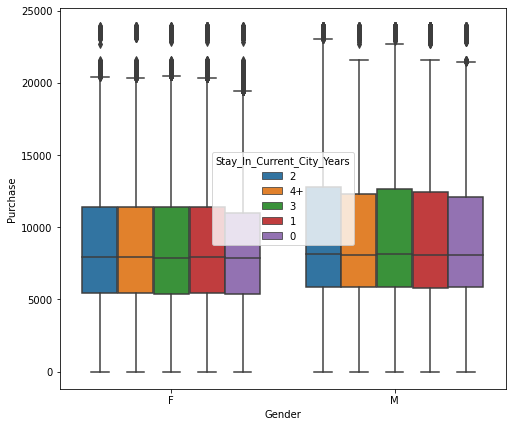

In [ ]:
plt.figure(figsize = (8, 7))
sns.boxplot(data=df, y='Purchase', x='Gender', hue='Stay_In_Current_City_Years')

#Gender purchase Analysis

In [ ]:
amt_df = df.groupby(['User_ID', 'Gender'])[['Purchase']].sum()
amt_df = amt_df.reset_index()
amt_df

,User_ID,Gender,Purchase
0,1000001,F,334093
1,1000002,M,810472
2,1000003,M,341635
3,1000004,M,206468
4,1000005,M,821001
...,...,...,...
5886,1006036,F,4116058
5887,1006037,F,1119538
5888,1006038,F,90034
5889,1006039,F,590319


In [ ]:
# Gender wise value counts in avg_amt_df
df['Gender'].value_counts()

M    414259
F    135809
Name: Gender, dtype: int64

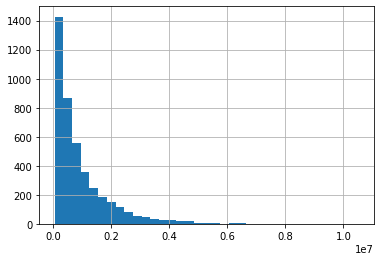

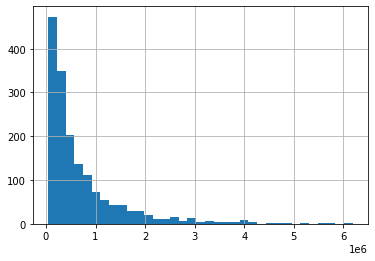

In [ ]:
# histogram of average amount spend for each customer - Male & Female
amt_df[amt_df['Gender']=='M']['Purchase'].hist(bins=35)
plt.show()

amt_df[amt_df['Gender']=='F']['Purchase'].hist(bins=35)
plt.show()

In [ ]:
male_avg = amt_df[amt_df['Gender']=='M']['Purchase'].mean()
print(male_avg)
female_avg = amt_df[amt_df['Gender']=='F']['Purchase'].mean()
print(female_avg)

925344.4023668639
712024.3949579832


#Confidence intervals (different Category for Purchases)

###CI for gender

In [ ]:
df_Male = df[df["Gender"] == "M"]["Purchase"]
df_Male.mean()

9437.526040472265

<Axes: ylabel='Count'>

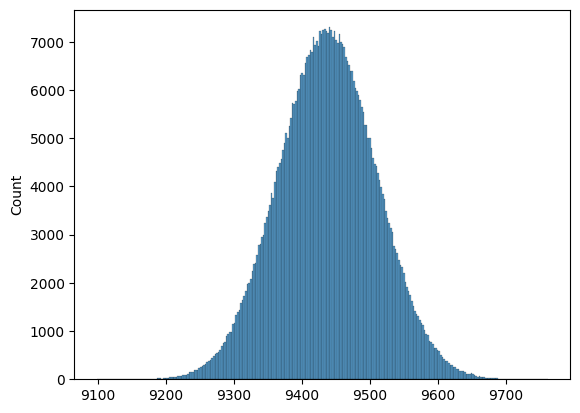

In [ ]:
#distribution of the mean of the expenses by male customers
df_Male = df[df["Gender"] == "M"]["Purchase"]
gross_male_survey = []
for i in range(df.shape[0]):
    gross_samples = np.random.choice(df_Male, size = 5000)
    gross_mean = np.mean(gross_samples)
    gross_male_survey.append(gross_mean)
sns.histplot(gross_male_survey)

In [ ]:
#CI of male purchases= 90%
np.percentile(gross_male_survey, [5,95])

array([9319.0919 , 9556.14379])

In [ ]:
#CI of male purchases= 95%
np.percentile(gross_male_survey, [2.5,97.5])

array([9297.106835, 9579.03066 ])

In [ ]:
#CI of male purchases= 99%
np.percentile(gross_male_survey, [0.5,99.5])

array([9253.519223, 9623.398588])

In [ ]:
df_female = df[df["Gender"] == "f"]["Purchase"]
df_female.mean()

nan

<Axes: ylabel='Count'>

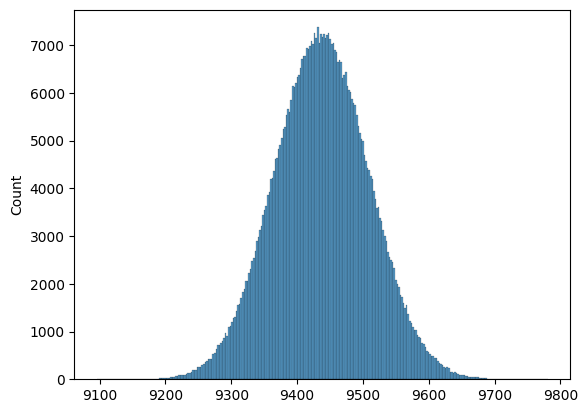

In [ ]:
#distribution of the mean of the expenses by male customers
df_female = df[df["Gender"] == "M"]["Purchase"]
gross_female_survey = []
for i in range(df.shape[0]):
    gross_samples = np.random.choice(df_female, size = 5000)
    gross_mean = np.mean(gross_samples)
    gross_female_survey.append(gross_mean)
sns.histplot(gross_female_survey)

In [ ]:
#CI of female purchases= 90%
np.percentile(gross_female_survey, [5,95])

array([9319.202 , 9556.0866])

In [ ]:
#CI of female purchases= 95%
np.percentile(gross_female_survey, [2.5,97.5])

array([9296.710405, 9579.276995])

In [ ]:
#CI of female purchases= 99%
np.percentile(gross_female_survey, [0.5,99.5])

array([9253.129334, 9623.165198])

### CI for Marital Status

In [ ]:
df_Unmaried = df[df["Marital_Status"] == 0]["Purchase"]
df_Unmaried.mean()

9265.907618921507

<Axes: ylabel='Count'>

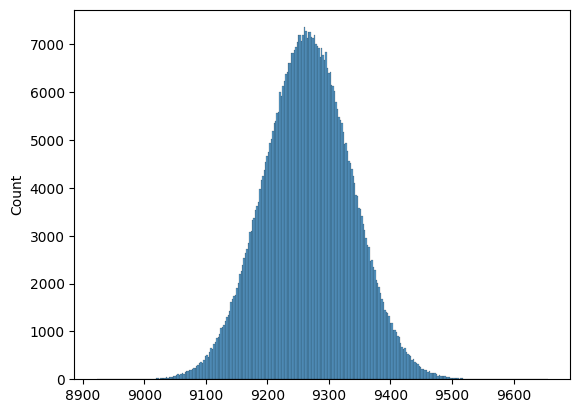

In [ ]:
#distribution of the mean of the expenses by Unmaried customers

gross_unmaried_survey = []
for i in range(df.shape[0]):
    gross_samples = np.random.choice(df_Unmaried, size = 5000)
    gross_mean = np.mean(gross_samples)
    gross_unmaried_survey.append(gross_mean)
sns.histplot(gross_unmaried_survey)

In [ ]:
#CI of unmaried purchases= 90%
np.percentile(gross_unmaried_survey, [5,95])

array([9149.01995, 9382.98891])

In [ ]:
#CI of unmaried purchases= 95%
np.percentile(gross_unmaried_survey, [2.5,97.5])

array([9126.593555, 9405.795725])

In [ ]:
#CI of unmaried purchases= 99%
np.percentile(gross_unmaried_survey, [0.5,99.5])

array([9082.473151, 9449.391253])

In [ ]:
df_Married = df[df["Marital_Status"] == 1]["Purchase"]
df_Married.mean()

9261.174574082374

<Axes: ylabel='Count'>

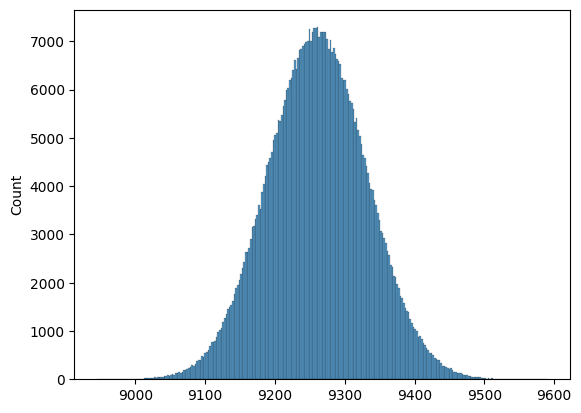

In [ ]:
#distribution of the mean of the expenses by Married customers

gross_married_survey = []
for i in range(df.shape[0]):
    gross_samples = np.random.choice(df_Married, size = 5000)
    gross_mean = np.mean(gross_samples)
    gross_married_survey.append(gross_mean)
sns.histplot(gross_married_survey)

In [ ]:
#CI of married purchases= 90%
np.percentile(gross_married_survey, [5,95])

array([9144.86083, 9378.31959])

In [ ]:
#CI of married purchases= 95%
np.percentile(gross_unmaried_survey, [2.5,97.5])

array([9126.593555, 9405.795725])

In [ ]:
#CI of married purchases= 99%
np.percentile(gross_married_survey, [0.5,99.5])

array([9078.988034, 9445.22131 ])

### CI for Age group 0-17

8933.464640444974
CI of age group 0-17 at 90%: [8814.99073 9052.50715]
CI of age group 0-17 at 95%: [8792.38294 9075.21994]
CI of age group 0-17 at 99%: [8748.346203 9120.078722]


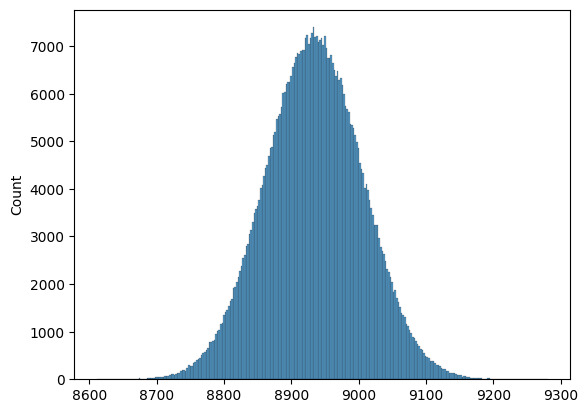

In [ ]:
#distribution of the mean of the expenses by People of Age group 0-17
df_age_0_17 = df[df["Age"] == "0-17"]["Purchase"]
print(df_age_0_17.mean())

gross_age_0_17_survey = []
for i in range(df.shape[0]):
    gross_samples = np.random.choice(df_age_0_17 , size = 5000)
    gross_mean = np.mean(gross_samples)
    gross_age_0_17_survey.append(gross_mean)
sns.histplot(gross_age_0_17_survey)

#CI of age group 0-17= 90%
print(f"CI of age group 0-17 at 90%: {np.percentile(gross_age_0_17_survey, [5,95])}")

#CI of age group 0-17= 95%
print(f"CI of age group 0-17 at 95%: {np.percentile(gross_age_0_17_survey, [2.5,97.5])}")

#CI of age group 0-17= 99%
print(f"CI of age group 0-17 at 99%: {np.percentile(gross_age_0_17_survey, [0.5,99.5])}")

### CI for Age group 18-25

9169.663606261289
CI of age group 18-25 at 90%: [9052.69956 9287.0104 ]
CI of age group 18-25 at 95%: [9030.304215 9309.750125]
CI of age group 18-25 at 99%: [8986.902561 9353.186321]


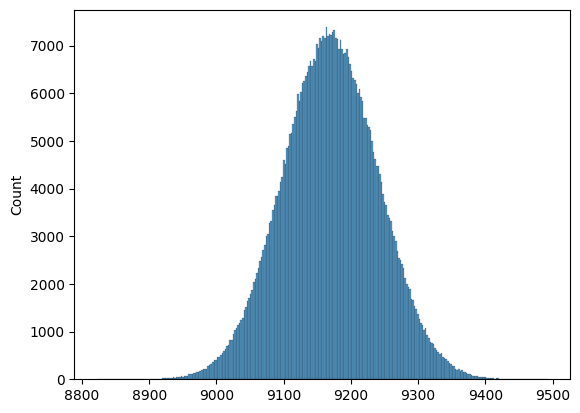

In [ ]:
#distribution of the mean of the expenses by People of Age group 18-25
df_age_18_25 = df[df["Age"] == "18-25"]["Purchase"]
print(df_age_18_25.mean())

gross_age_18_25_survey = []
for i in range(df.shape[0]):
    gross_samples = np.random.choice(df_age_18_25 , size = 5000)
    gross_mean = np.mean(gross_samples)
    gross_age_18_25_survey.append(gross_mean)
sns.histplot(gross_age_18_25_survey)

#CI of age group 18-25= 90%
print(f"CI of age group 18-25 at 90%: {np.percentile(gross_age_18_25_survey, [5,95])}")

#CI of age group 18-25= 95%
print(f"CI of age group 18-25 at 95%: {np.percentile(gross_age_18_25_survey, [2.5,97.5])}")

#CI of age group 18-25= 99%
print(f"CI of age group 18-25 at 99%: {np.percentile(gross_age_18_25_survey, [0.5,99.5])}")

###CI for Age group 26-35

9252.690632869888
CI of age group 26_35 at 90%: [9136.20361 9369.80658]
CI of age group 26_35 at 95%: [9114.057135 9392.34926 ]
CI of age group 26_35 at 99%: [9070.448542 9436.431522]


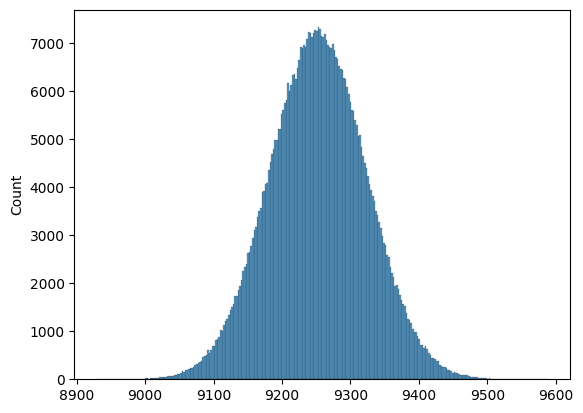

In [ ]:
#distribution of the mean of the expenses by People of Age group 26-35
df_age_26_35 = df[df["Age"] == "26-35"]["Purchase"]
print(df_age_26_35.mean())

gross_age_26_35_survey = []
for i in range(df.shape[0]):
    gross_samples = np.random.choice(df_age_26_35 , size = 5000)
    gross_mean = np.mean(gross_samples)
    gross_age_26_35_survey.append(gross_mean)
sns.histplot(gross_age_26_35_survey)

#CI of age group 26_35= 90%
print(f"CI of age group 26_35 at 90%: {np.percentile(gross_age_26_35_survey, [5,95])}")

#CI of age group 26_35= 95%
print(f"CI of age group 26_35 at 95%: {np.percentile(gross_age_26_35_survey, [2.5,97.5])}")

#CI of age group 26_35= 99%
print(f"CI of age group 26_35 at 99%: {np.percentile(gross_age_26_35_survey, [0.5,99.5])}")

###CI for Age group 36-45

9331.350694917874
CI of age group 36_45 at 90%: [9214.45016 9448.37699]
CI of age group 36_45 at 95%: [9192.43369 9470.73074]
CI of age group 36_45 at 99%: [9148.950472 9514.919725]


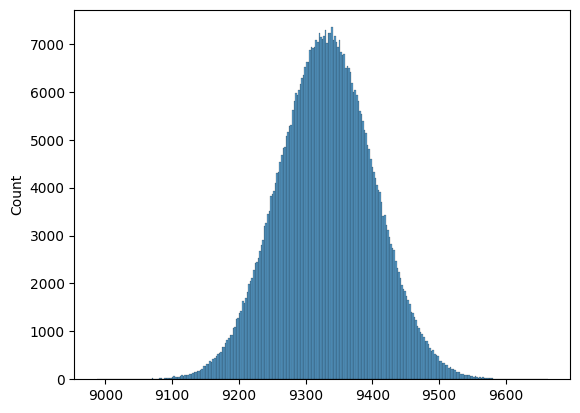

In [ ]:
#distribution of the mean of the expenses by People of Age group 36_45
df_age_36_45 = df[df["Age"] == "36-45"]["Purchase"]
print(df_age_36_45.mean())

gross_age_36_45_survey = []
for i in range(df.shape[0]):
    gross_samples = np.random.choice(df_age_36_45 , size = 5000)
    gross_mean = np.mean(gross_samples)
    gross_age_36_45_survey.append(gross_mean)
sns.histplot(gross_age_36_45_survey)

#CI of age group 36_45= 90%
print(f"CI of age group 36_45 at 90%: {np.percentile(gross_age_36_45_survey, [5,95])}")

#CI of age group 36_45= 95%
print(f"CI of age group 36_45 at 95%: {np.percentile(gross_age_36_45_survey, [2.5,97.5])}")

#CI of age group 36_45= 99%
print(f"CI of age group 36_45 at 99%: {np.percentile(gross_age_36_45_survey, [0.5,99.5])}")

###CI for Age group 46-50

9208.625697468327
CI of age group 46_50 at 90%: [9093.35319 9324.36006]
CI of age group 46_50 at 95%: [9071.399095 9346.467595]
CI of age group 46_50 at 99%: [9028.958269 9391.017596]


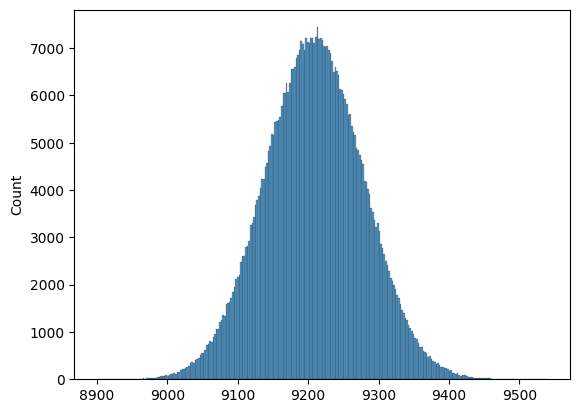

In [ ]:
#distribution of the mean of the expenses by People of Age group 46_50
df_age_46_50 = df[df["Age"] == "46-50"]["Purchase"]
print(df_age_46_50.mean())

gross_age_46_50_survey = []
for i in range(df.shape[0]):
    gross_samples = np.random.choice(df_age_46_50 , size = 5000)
    gross_mean = np.mean(gross_samples)
    gross_age_46_50_survey.append(gross_mean)
sns.histplot(gross_age_46_50_survey)

#CI of age group 46_50= 90%
print(f"CI of age group 46_50 at 90%: {np.percentile(gross_age_46_50_survey, [5,95])}")

#CI of age group 46_50= 95%
print(f"CI of age group 46_50 at 95%: {np.percentile(gross_age_46_50_survey, [2.5,97.5])}")

#CI of age group 46_50= 99%
print(f"CI of age group 46_50 at 99%: {np.percentile(gross_age_46_50_survey, [0.5,99.5])}")

###CI for Age group 51-55

9534.808030960236
CI of age group 51_55 at 90%: [9416.51267 9653.04158]
CI of age group 51_55 at 95%: [9394.03023 9675.87239]
CI of age group 51_55 at 99%: [9349.754171 9720.44913 ]


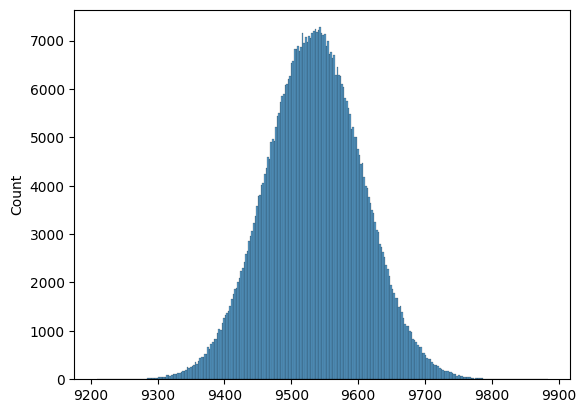

In [ ]:
#distribution of the mean of the expenses by People of Age group 51_55
df_age_51_55 = df[df["Age"] == "51-55"]["Purchase"]
print(df_age_51_55.mean())

gross_age_51_55_survey = []
for i in range(df.shape[0]):
    gross_samples = np.random.choice(df_age_51_55 , size = 5000)
    gross_mean = np.mean(gross_samples)
    gross_age_51_55_survey.append(gross_mean)
sns.histplot(gross_age_51_55_survey)

#CI of age group 51_55= 90%
print(f"CI of age group 51_55 at 90%: {np.percentile(gross_age_51_55_survey, [5,95])}")

#CI of age group 51_55= 95%
print(f"CI of age group 51_55 at 95%: {np.percentile(gross_age_51_55_survey, [2.5,97.5])}")

#CI of age group 51_55= 99%
print(f"CI of age group 51_55 at 99%: {np.percentile(gross_age_51_55_survey, [0.5,99.5])}")

### CI for Age group 55+

9336.280459449405
CI of age group 55_plus at 90%: [9220.074  9452.9551]
CI of age group 55_plus at 95%: [9197.94143 9475.53685]
CI of age group 55_plus at 99%: [9154.981819 9519.306728]


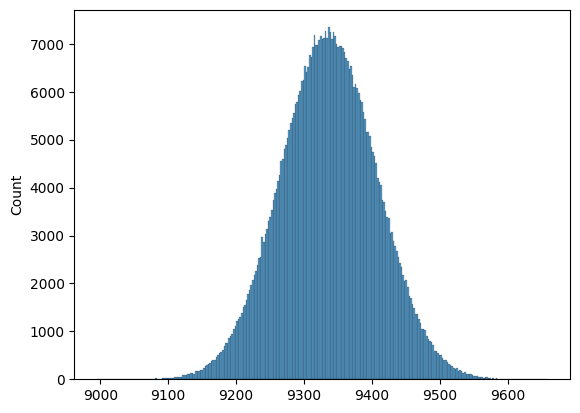

In [ ]:
#distribution of the mean of the expenses by People of Age group 55+
df_age_55_plus = df[df["Age"] == "55+"]["Purchase"]
print(df_age_55_plus.mean())

gross_age_55_plus_survey = []
for i in range(df.shape[0]):
    gross_samples = np.random.choice(df_age_55_plus , size = 5000)
    gross_mean = np.mean(gross_samples)
    gross_age_55_plus_survey.append(gross_mean)
sns.histplot(gross_age_55_plus_survey)

#CI of age group 55_plus= 90%
print(f"CI of age group 55_plus at 90%: {np.percentile(gross_age_55_plus_survey, [5,95])}")

#CI of age group 55_plus= 95%
print(f"CI of age group 55_plus at 95%: {np.percentile(gross_age_55_plus_survey, [2.5,97.5])}")

#CI of age group 55_plus= 99%
print(f"CI of age group 55_plus at 99%: {np.percentile(gross_age_55_plus_survey, [0.5,99.5])}")

#CLT Analysis

###Male and Female distribution of means, Sample size: 1000

<ipython-input-16-f6e207f911c6>:14: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(male_means).set_title("Male and Female distribution of means, Sample size: 1000")
<ipython-input-16-f6e207f911c6>:18: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(female_means)


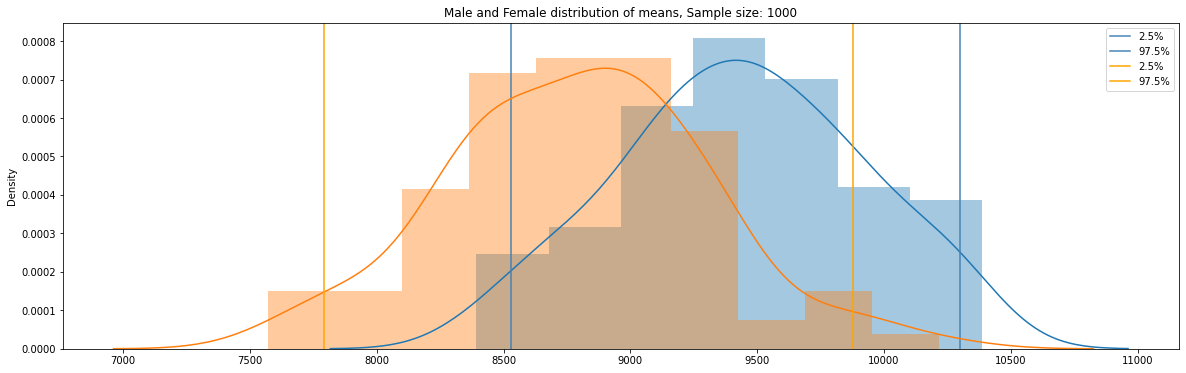

In [ ]:
avgamt_gender = df[['User_ID','Gender','Purchase']].copy()

avgamt_male = avgamt_gender[avgamt_gender['Gender']=='M'][['Purchase']]
avgamt_female = avgamt_gender[avgamt_gender['Gender']=='F'][['Purchase']]

sample_size = 100
num_repitions = 100

male_means = [avgamt_male.sample(sample_size).mean() for i in range (num_repitions)]
female_means = [avgamt_female.sample(sample_size).mean() for i in range (num_repitions)]

plt.figure(figsize = (20,6))

sns.distplot(male_means).set_title("Male and Female distribution of means, Sample size: 1000")
plt.axvline(np.percentile(male_means, 2.5), linestyle='-', color='steelblue',label="2.5%")
plt.axvline(np.percentile(male_means, 97.5), linestyle='-', color='steelblue',label="97.5%")

sns.distplot(female_means)
plt.axvline(np.percentile(female_means, 2.5), linestyle='-', color='orange',label="2.5%")
plt.axvline(np.percentile(female_means, 97.5), linestyle='-', color='orange',label="97.5%")

plt.legend()
plt.show()


### Single and Married distribution of means, Sample size: 1000

<ipython-input-17-43a4e9bec008>:14: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(single_means).set_title("Single and Married distribution of means, Sample size: 1000")
<ipython-input-17-43a4e9bec008>:18: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(married_means)


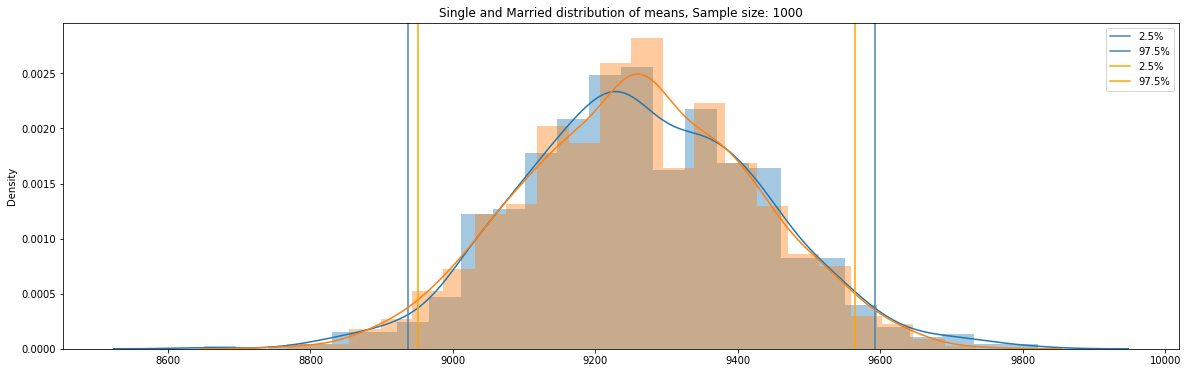

In [ ]:
avgamt_status = df[['User_ID','Marital_Status','Purchase']].copy()

avgamt_single = avgamt_status[avgamt_status['Marital_Status']==0][['Purchase']]
avgamt_married = avgamt_status[avgamt_status['Marital_Status']==1][['Purchase']]

sample_size = 1000
num_repitions = 1000

single_means = [avgamt_single.sample(sample_size).mean() for k in range (num_repitions)]
married_means = [avgamt_married.sample(sample_size).mean() for k in range (num_repitions)]

plt.figure(figsize = (20,6))

sns.distplot(single_means).set_title("Single and Married distribution of means, Sample size: 1000")
plt.axvline(np.percentile(single_means, 2.5), linestyle='-', color='steelblue',label="2.5%")
plt.axvline(np.percentile(single_means, 97.5), linestyle='-', color='steelblue',label="97.5%")

sns.distplot(married_means)
plt.axvline(np.percentile(married_means, 2.5), linestyle='-', color='orange',label="2.5%")
plt.axvline(np.percentile(married_means, 97.5), linestyle='-', color='orange',label="97.5%")

plt.legend()
plt.show()


#Correlation

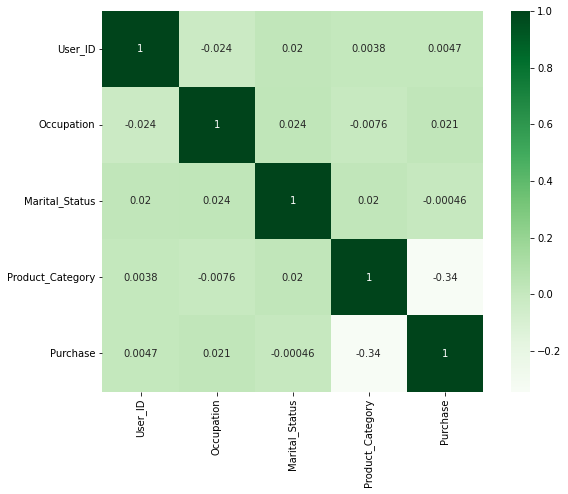

In [ ]:
plt.figure(figsize = (10, 7))
ax = sns.heatmap(df.corr(),annot=True,cmap='Greens',square=True)

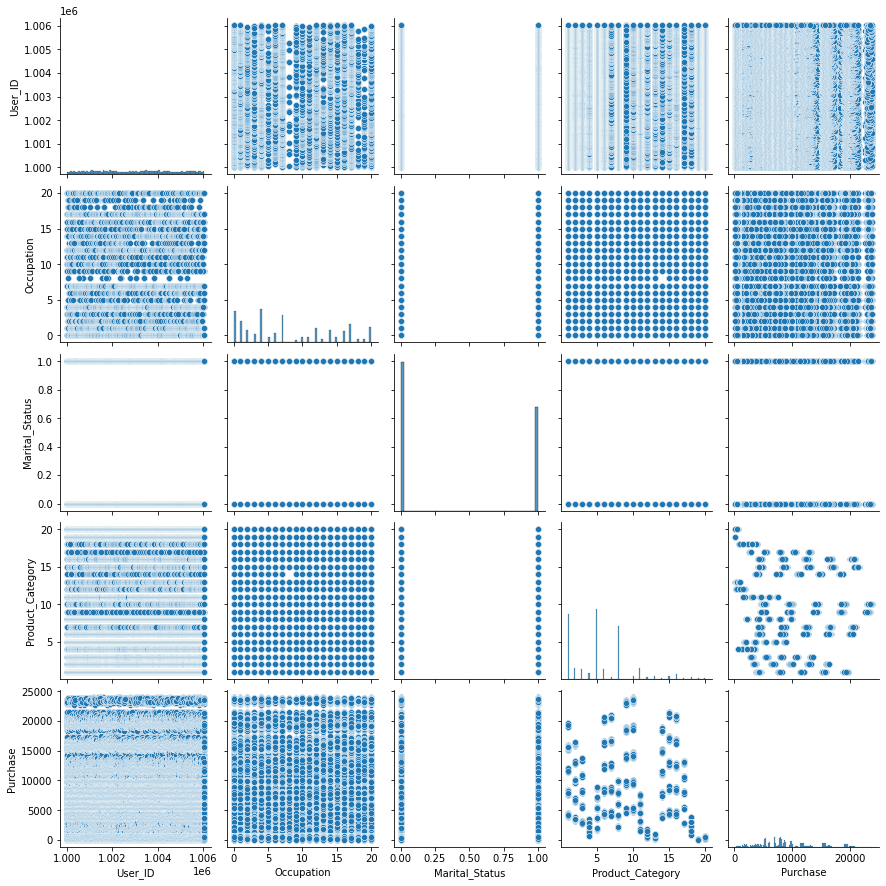

In [ ]:
sns.pairplot(df)

#Insights
**Observarion from characteristics of data:**
*  ~ 80% of the users are between the age 18-50 (40%: 26-35, 18%: 18-25, 20%: 36-45)
*  75% of the users are Male and 25% are Female
*  60% Single, 40% Married
*  35% Staying in the city from 1 year, 18% from 2 years, 17% from 3 years
*  Total of 20 product categories are there
*  There are 20 differnent types of occupations in the city

**Univariate analysis observation:**
*  Most of the users are Male
*  There are 20 different types of Occupation and Product_Category
*  More users belong to B City_Category
*  More users are Single as compare to Married
*  Product_Category - 1, 5, 8, & 11 have highest purchasing frequency.

**Statistical observation**
*  There are more single people than married people.
*  Most mall customers are between the ages of 26 and 35.
*  The majority of our customers come from city category B but customers come from City category C spent more as mean is 9719.
*  Male customers tend to spend more than female customers, as the mean is higher for male customers.
*  The majority of users come from City Category C, but more people from City Category B tend to purchase, which suggests the same users visit the mall multiple times in City Category B.

**Outlier and skewness observation:**
*  Purchse column has 2677 datapoints as outlier, which is 0.75% of total rows
*  Purchase column has "right-skewed distribution" which means the mass of the distribution is concentrated on the left of the figure.
*  Majority of Customers purchase within the 5,000 - 20,000 range.

**CLT Analysis**
*  In light of the fact that females spend less than males on average, management needs to focus on their specific needs differently. Adding some additional offers for women can increase their spending on Black Friday.

* Overlapping is evident for married vs single customer spend even when more samples are analyzed, which indicates that customers spend the same regardless of whether they are single or married.
* For Unmarried customer (sample size 100000) range for mean purchase with confidence interval 99% is [9162.0, 9241.98]
* For married customer range for mean purchase with confidence interval 90% is [9148.09, 9227.05]

**Confidence Level Observation**
*  Histplot shows that the perfect bell curve, which is the perfect Gaussion Distribution.

#Recommendation
*  Men spent more money than women, company can focus on retaining the male customers and getting more male customers. we can say like women spend less on Black Friday than men. compnay should also take initiatives to attract female customers, company can increase producs in store that made for women, like makeup items, household items, kitchen utensils, accessories .

*  Product_Category - 1, 5, 8 have highest purchasing frequency. it means these are the products in these categories are in more demand. Company can focus on selling more of these products.

*  Unmarried customers spend more money than married customers, So company should focus on acquisition of Unmarried customers.

*  Customers in the age 26-35 spend more money than the others, So company should focus on acquisition of customers who are in the age 26-35.

*  We have more customers aged 26-35 in the city category B and A, company can focus more on these customers for these cities to increase the business.

*  Male customers living in City_Category C spend more money than other male customers living in B or C, Selling more products in the City_Category C will help the company increase the revenue.

*  Product category 9, 17 have very less purchase. Company can think of dropping it.

*  The top 10 users who have purchased more company should give more offers and discounts so that they can be retained and can be helpful for companies business.

*  The occupation which are contributing more company can think of offering credit cards or other benefits to those customers by liasing with some financial partners to increase the sales.

*  The top products should be given focus in order to maintain the quality in order to further increase the sales of those products.

*  People who are staying in city for an year have contributed to 35% of the total purchase amount. Company can focus on such customer base who are neither too old nor too new residents in the city.

*  We have highest frequency of purchase order between 5k and 10k, company can focus more on these mid range products to increase the sales.